# Hypothesis: Vaccination have a positive effect on lowering the increasing rate of Covid-19 cases and deaths 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and make it dataframe
covid_csv = "Resources/owid-covid-data.csv"
covid_df = pd.read_csv(covid_csv)
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116560,ZWE,Africa,Zimbabwe,2021-09-09,126056.0,125.0,134.000,4521.0,4.0,10.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116561,ZWE,Africa,Zimbabwe,2021-09-10,126163.0,107.0,118.857,4532.0,11.0,10.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116562,ZWE,Africa,Zimbabwe,2021-09-11,126220.0,57.0,113.571,4536.0,4.0,10.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116563,ZWE,Africa,Zimbabwe,2021-09-12,126269.0,49.0,102.714,4538.0,2.0,8.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [3]:
# Select the world covid data for visualization
world_covid = covid_df[covid_df["location"]=="World"]
# too many data involved, look at info to figure out what kinds of data involved in this dataframe
world_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 114354 to 114954
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               601 non-null    object 
 1   continent                              0 non-null      object 
 2   location                               601 non-null    object 
 3   date                                   601 non-null    object 
 4   total_cases                            601 non-null    float64
 5   new_cases                              601 non-null    float64
 6   new_cases_smoothed                     595 non-null    float64
 7   total_deaths                           601 non-null    float64
 8   new_deaths                             601 non-null    float64
 9   new_deaths_smoothed                    595 non-null    float64
 10  total_cases_per_million                601 non-null    float64
 11

In [4]:
# From the above infomation, select the data I am interested with
# As for vaccination, time is a key factor, thus need date,total cases, total deaths and people vaccinated/fully vaccinated
world_vaccine = world_covid.iloc[:,[2,3,4,7,35,36]]
# At initial, there is no vaccination available, data is NaN, replace these Na values as 0
world_vaccine["people_vaccinated"] = world_vaccine["people_vaccinated"].fillna(0)
world_vaccine["people_fully_vaccinated"] = world_vaccine["people_fully_vaccinated"].fillna(0)
# reset index
world_vaccine = world_vaccine.reset_index(drop=True)
world_vaccine

,location,date,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated
0,World,2020-01-22,557.0,17.0,0.000000e+00,0.000000e+00
1,World,2020-01-23,655.0,18.0,0.000000e+00,0.000000e+00
2,World,2020-01-24,941.0,26.0,0.000000e+00,0.000000e+00
3,World,2020-01-25,1433.0,42.0,0.000000e+00,0.000000e+00
4,World,2020-01-26,2118.0,56.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
596,World,2021-09-09,223219198.0,4607804.0,3.276801e+09,2.326375e+09
597,World,2021-09-10,223848084.0,4616846.0,3.288731e+09,2.337217e+09
598,World,2021-09-11,224296843.0,4625126.0,3.301548e+09,2.349094e+09
599,World,2021-09-12,224658951.0,4630613.0,3.316579e+09,2.361777e+09


In [5]:
# Convert Date to Days since Covid-19 was reported and recorded
# This can be done by using index of World data as Days 
world_vaccine['days'] = world_vaccine.index
# Find the days when Vaccination was available 
no_vaccine_day = world_vaccine[world_vaccine["people_vaccinated"]==0].index
# Find out when was vaccination available in the world
print(f"After {no_vaccine_day[-1]} days, first vaccination was available in the world.")
world_vaccine

After 313 days, first vaccination was available in the world.


,location,date,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated,days
0,World,2020-01-22,557.0,17.0,0.000000e+00,0.000000e+00,0
1,World,2020-01-23,655.0,18.0,0.000000e+00,0.000000e+00,1
2,World,2020-01-24,941.0,26.0,0.000000e+00,0.000000e+00,2
3,World,2020-01-25,1433.0,42.0,0.000000e+00,0.000000e+00,3
4,World,2020-01-26,2118.0,56.0,0.000000e+00,0.000000e+00,4
...,...,...,...,...,...,...,...
596,World,2021-09-09,223219198.0,4607804.0,3.276801e+09,2.326375e+09,596
597,World,2021-09-10,223848084.0,4616846.0,3.288731e+09,2.337217e+09,597
598,World,2021-09-11,224296843.0,4625126.0,3.301548e+09,2.349094e+09,598
599,World,2021-09-12,224658951.0,4630613.0,3.316579e+09,2.361777e+09,599


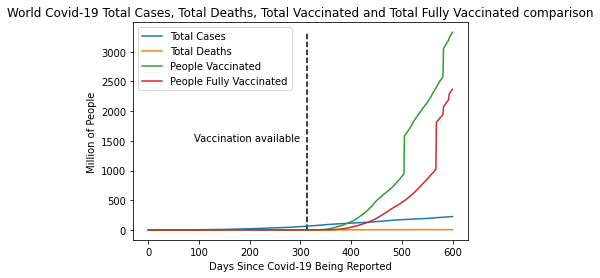

In [6]:
# select data for x- and y-axis to compare the trends of world Covid-19 total confirmed cases/deaths, total vaccinations/fully vaccinations
# as the population is large, convert to per million of people
x_axis = world_vaccine["days"]
y_axis1 = world_vaccine["total_cases"]/1000000
y_axis2 = world_vaccine["total_deaths"]/1000000
y_axis3 = world_vaccine["people_vaccinated"]/1000000
y_axis4 = world_vaccine["people_fully_vaccinated"]/1000000
# Plot these trends in one figures and give proper legend
plot_total_cases, = plt.plot(x_axis, y_axis1, label="Total Cases")
plot_total_deaths, = plt.plot(x_axis, y_axis2, label="Total Deaths")
plot_total_vaccine, = plt.plot(x_axis, y_axis3, label="People Vaccinated")
plot_total_fully_vaccine, = plt.plot(x_axis, y_axis4, label="People Fully Vaccinated")
# Tell when the vaccination is available
plt.vlines(no_vaccine_day[-1], world_vaccine["people_vaccinated"].min()/1000000, world_vaccine["people_vaccinated"].max()/1000000, colors='k', linestyles='--')
plt.annotate("Vaccination available",(90,1500))
# Give titles, axis labels etc.
plt.title("World Covid-19 Total Cases, Total Deaths, Total Vaccinated and Total Fully Vaccinated comparison")
plt.xlabel("Days Since Covid-19 Being Reported")
plt.legend(handles=[plot_total_cases, plot_total_deaths, plot_total_vaccine, plot_total_fully_vaccine])
plt.ylabel("Million of People")
plt.savefig("Outputs_YY/world_covid_trends_comparison.png")
plt.show()

In [7]:
# It is also important to know daily new confirmed cases/deaths and new vaccinations to find some relationships
new_data = world_covid.iloc[:,[2,3,5, 8,38]]
# Same data cleaning process as above
new_data["new_vaccinations"] = new_data["new_vaccinations"].fillna(0)
new_data = new_data.reset_index(drop=True)
new_data['days'] = new_data.index
new_data
# Do some statistics to have a general idea about daily confirmed cases/deaths and new vaccinations
new_data.describe()


,new_cases,new_deaths,new_vaccinations,days
count,601.000000,601.000000,6.010000e+02,601.000000
mean,374035.269551,7705.184692,9.591859e+06,300.000000
std,243864.161153,4076.970481,1.449212e+07,173.638033
min,0.000000,0.000000,0.000000e+00,0.000000
25%,144440.000000,5257.000000,0.000000e+00,150.000000
50%,372183.000000,7321.000000,0.000000e+00,300.000000
75%,568141.000000,10476.000000,1.814357e+07,450.000000
max,905932.000000,17976.000000,5.622950e+07,600.000000


In [8]:
# have a look at some dates have the greatest new daily confirmed cases (top 20)
descending_new_data = new_data.sort_values(by="new_cases",ascending=False)
descending_new_data.head(20)

,location,date,new_cases,new_deaths,new_vaccinations,days
462,World,2021-04-28,905932.0,16018.0,24910710.0,462
457,World,2021-04-23,903605.0,15190.0,18715364.0,457
456,World,2021-04-22,899471.0,13902.0,22024643.0,456
463,World,2021-04-29,897727.0,15755.0,24333909.0,463
455,World,2021-04-21,889960.0,14915.0,18158694.0,455
351,World,2021-01-07,881557.0,15128.0,1236412.0,351
464,World,2021-04-30,879051.0,14014.0,25253208.0,464
470,World,2021-05-06,870583.0,14637.0,23696696.0,470
450,World,2021-04-16,857161.0,13316.0,17167119.0,450
454,World,2021-04-20,854199.0,14319.0,12334882.0,454


### From data above, it is expected that the increasing rate of comfirmed cases is highest between 440-480 days as most of the highest top 20 new cases occurred at this period of time.

In [9]:
# have a look at some dates have the greatest new daily vaccinations (top 20)
descending_new_data = new_data.sort_values(by="new_vaccinations",ascending=False)
descending_new_data.head(20)

,location,date,new_cases,new_deaths,new_vaccinations,days
559,World,2021-08-03,640786.0,10351.0,56229505.0,559
583,World,2021-08-27,744388.0,10234.0,50054048.0,583
588,World,2021-09-01,737332.0,12466.0,48194225.0,588
519,World,2021-06-24,404076.0,8622.0,48185457.0,519
526,World,2021-07-01,440650.0,8691.0,47536712.0,526
512,World,2021-06-17,392257.0,9268.0,46728535.0,512
554,World,2021-07-29,651550.0,10833.0,46594707.0,554
582,World,2021-08-26,734207.0,11648.0,45013605.0,582
560,World,2021-08-04,671214.0,10587.0,44811424.0,560
580,World,2021-08-24,688519.0,11053.0,44375859.0,580


### As vaccination takes time to be effective (assume at least 90 days if more than 70% of the population is vaccinated), from the data above, the highest top 20 new vaccinations all occur at after 510 days, this indicates that the dataset may difficult to present the effectiveness of vaccination (LOWER the increasing rate/ death rate) because only 600 days of data was recorded.

In [10]:
# Select some days to see how Covid-19 was outbreak over the world
# Usually concerned about every 50 or 100 days during the period, but 403 days was a special day
# it was 90 days after vaccination available, some effects of vaccination may be expected after 403 days
slopes_days = [0,50,150,250,350,403,480,540,600]
# Retrieve relative data for x- and y-axis
x_axis_pre = world_vaccine["days"]
y_axis_cases = world_vaccine["total_cases"]/1000000
y_axis_deaths = world_vaccine["total_deaths"]/1000000

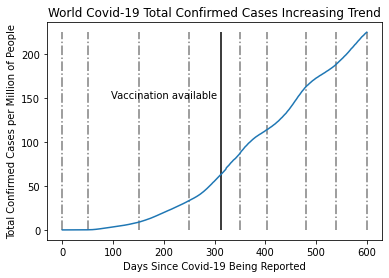

In [11]:
# Make a linear plot to show the increasing trend of total comfirmed cases by days
plt.plot(x_axis_pre, y_axis_cases)
# set the y-axis limitations for the vertical lines of interested days
y_min_cases = world_vaccine["total_cases"].min()/1000000
y_max_cases = world_vaccine["total_cases"].max()/1000000
# use a for loop to draw lines
for i in range(0, len(slopes_days)):
    plt.vlines(slopes_days[i], y_min_cases, y_max_cases, colors='grey', linestyles='-.')
# Again, show the important day of vaccination available day
plt.vlines(no_vaccine_day[-1], y_min_cases, y_max_cases, colors='k', linestyles='solid')
plt.annotate("Vaccination available",(95,150))
# Give titles and axis labels
plt.title("World Covid-19 Total Confirmed Cases Increasing Trend")
plt.xlabel("Days Since Covid-19 Being Reported")
plt.ylabel("Total Confirmed Cases per Million of People")
plt.savefig("Outputs_YY/total_cases_vs_days.png")
plt.show()

In [12]:
# use a for loop to calculate the increasing rate of total confirmed cases between selected days
for i in range(1, len(slopes_days)):
    x_values = world_vaccine["days"][slopes_days[i-1]:slopes_days[i]]
    y_values = world_vaccine["total_cases"][slopes_days[i-1]:slopes_days[i]]/1000000
    # use polyfit function to get the gradient of total confirmed cases between day ranges
    # Basically, the gradient represents the increasing rate of total Covid-19 cases from selected days
    pre_fitting = np.polyfit(x_values, y_values, 1)   
    pre_fit_slope = pre_fitting[0]
    print(f"The increasing rate of total Covid-19 cases is {pre_fit_slope} from day {slopes_days[i-1]} to day {slopes_days[i]}.\n")

The increasing rate of total Covid-19 cases is 0.0025666787995198078 from day 0 to day 50.

The increasing rate of total Covid-19 cases is 0.0864221931653165 from day 50 to day 150.

The increasing rate of total Covid-19 cases is 0.2501888534413442 from day 150 to day 250.

The increasing rate of total Covid-19 cases is 0.5594456660906091 from day 250 to day 350.

The increasing rate of total Covid-19 cases is 0.49448849983873533 from day 350 to day 403.

The increasing rate of total Covid-19 cases is 0.6577659309374831 from day 403 to day 480.

The increasing rate of total Covid-19 cases is 0.4055667988607942 from day 480 to day 540.

The increasing rate of total Covid-19 cases is 0.6264506417893855 from day 540 to day 600.



### As expected, the increasing rate of total Covid-19 cases was getting higher and higher initially, and then after 350 days, the increasing rate was lower for nearly 2 months (53 days). This may be due to some countries's politics (e.g. lockdowns, social distances etc.) and people's hygiene willness gettign better. 
### The vaccination effect may not be a key factor to lower the increasing rate of total cases as the amount of vaccination was still low and about one month may not let the vaccination be effective.
### As expected from the results of new daily confirmed cases, the increasing rate of total confirmed cases was highest between 403 to 480 days, as the greatest top 20 daily confirmed new cases occurred at this time range.
### And for the later two months after 480 days, the increasing rate was suddenly reduced (from 0.6578 to 0.4056), the main reason for this reduction may be due to the effectiveness of vaccination or small herd immunity was formed in some part over the world.
### However, after 540 days, the increasing rate was getting larger again (from 0.4056 to 0.6265), the possible reason was due to the mutation type of Delta was spreaded over the world to cause another outbreak.
### From the results of new daily vaccinations, it is expected that the best effection would occur after 600 days, which is out of the dataset and may expect to occur in the future. Hopefully, with more and more people getting vaccinated, strong herd immunity will form and the increasing rate of total Covid-19 cases will getting lower and lower in the near future.

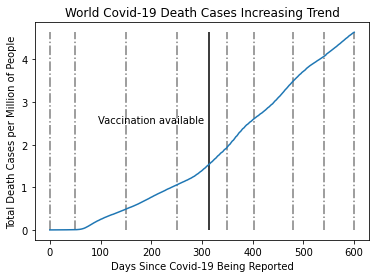

In [13]:
# Repeat same procedure for death cases trends
y_min_deaths = world_vaccine["total_deaths"].min()/1000000
y_max_deaths = world_vaccine["total_deaths"].max()/1000000
for i in range(0, len(slopes_days)):
    plt.vlines(slopes_days[i], y_min_deaths, y_max_deaths, colors='grey', linestyles='-.')


plt.vlines(no_vaccine_day[-1], y_min_deaths, y_max_deaths, colors='k', linestyles='solid')
plt.annotate("Vaccination available",(95,2.5))

plt.plot(x_axis_pre, y_axis_deaths)
plt.title("World Covid-19 Death Cases Increasing Trend")
plt.xlabel("Days Since Covid-19 Being Reported")
plt.ylabel("Total Death Cases per Million of People")
plt.savefig("Outputs_YY/total_deaths_vs_days.png")
plt.show()

In [14]:
# Repeat same procedure for death cases trends
for i in range(1, len(slopes_days)):
    x_values = world_vaccine["days"][slopes_days[i-1]:slopes_days[i]]
    y_values = world_vaccine["total_deaths"][slopes_days[i-1]:slopes_days[i]]/1000000
    pre_fitting = np.polyfit(x_values, y_values, 1)   
    pre_fit_slope = pre_fitting[0]
    print(f"The increasing rate of death cases of Covid-19 is {pre_fit_slope} from day {slopes_days[i-1]} to day {slopes_days[i]}.\n")

The increasing rate of death cases of Covid-19 is 9.217791116446577e-05 from day 0 to day 50.

The increasing rate of death cases of Covid-19 is 0.005315983174317429 from day 50 to day 150.

The increasing rate of death cases of Covid-19 is 0.005817603672367238 from day 150 to day 250.

The increasing rate of death cases of Covid-19 is 0.009046408040804081 from day 250 to day 350.

The increasing rate of death cases of Covid-19 is 0.012892482422189959 from day 350 to day 403.

The increasing rate of death cases of Covid-19 is 0.011595011251905983 from day 403 to day 480.

The increasing rate of death cases of Covid-19 is 0.009493454765212557 from day 480 to day 540.

The increasing rate of death cases of Covid-19 is 0.009645145540427887 from day 540 to day 600.



### The death rates almost follow the same pattern as total confirmed cases.